In [13]:
pip install pandas mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Step 1: Connect to DB
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Step 2: Create the 'sales' table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
);
""")

# Step 3: Insert sample data
sample_data = [
    ('Laptop', 5, 1200.00),
('Mouse', 25, 25.50),
('Keyboard', 15, 75.00),
('Monitor', 10, 300.00),
('Laptop', 3, 1150.00),
('Mouse', 30, 24.00),
('Webcam', 20, 50.00),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?);", sample_data)

# Step 4: Commit and close
conn.commit()
conn.close()

In [17]:
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables in DB:", tables)

conn.close()


Tables in DB: [('sales',), ('sqlite_sequence',)]


----- Basic Sales Summary -----
    product  total_quantity  revenue
0     Apple              15      7.5
1    Banana              30      6.0
2  Keyboard              30   2250.0
3    Laptop              16  18900.0
4   Monitor              20   6000.0
5     Mouse             110   2715.0
6    Orange               8      4.8
7    Webcam              40   2000.0
-----------------------------


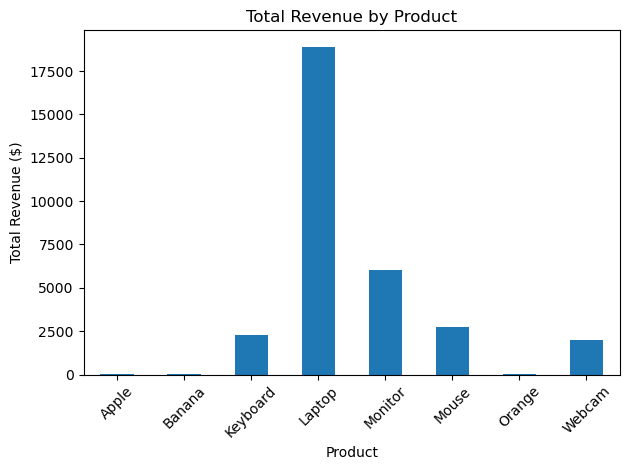

Sales summary has been printed and the chart 'sales_chart.png' has been saved.


In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Connect to the SQLite database ---
# This will create the database file if it doesn't exist yet.
conn = sqlite3.connect('sales_data.db')

# --- 2. Define and Run the SQL Query ---
# This query calculates the total quantity sold and total revenue for each product.
query = """
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS revenue
FROM
    sales
GROUP BY
    product;
"""

# --- 3. Load the Query Results into a Pandas DataFrame ---
# pandas' read_sql_query function is a convenient way to import SQL data.
df = pd.read_sql_query(query, conn)

# --- Close the database connection as it's no longer needed ---
conn.close()

# --- 4. Display the Summarized Data ---
print("----- Basic Sales Summary -----")
print(df)
print("-----------------------------")


# --- 5. Visualize the Data with a Bar Chart ---
# Create a bar chart of the revenue per product.
df.plot(kind='bar', x='product', y='revenue', legend=False, title='Total Revenue by Product')

# Add labels for clarity.
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45) # Rotate product names for better readability.
plt.tight_layout() # Adjust plot to ensure everything fits without overlapping.


# --- 6. Save the Chart to a File ---
# This saves the generated plot as a PNG image in the same directory.
plt.savefig('sales_chart.png')

# --- Display the chart ---
plt.show()

print("Sales summary has been printed and the chart 'sales_chart.png' has been saved.")